# 1. Load The Tweets Dataset

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [2]:
data = pd.read_csv('tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
# 0 refers to positive sentiment, 1 is negative sentiment

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [5]:
# check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
# drop the id column
data.drop(['id'], axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [7]:
# Check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

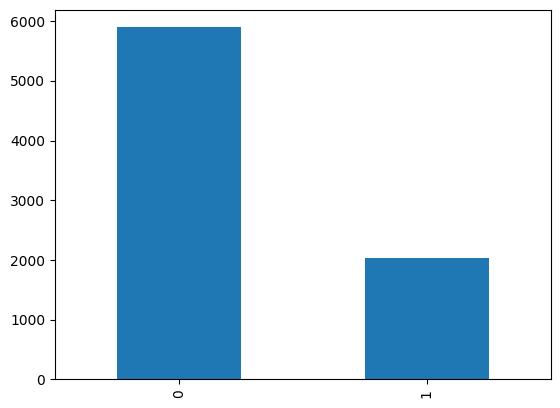

In [8]:
# plot the label counts
data['label'].value_counts().plot(kind='bar')

# 2. Data Cleaning

In [9]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [10]:
import re

In [11]:
# Substitute 's with " is"
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [12]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [13]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [14]:
# remove the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [16]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [17]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [18]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [19]:
# Stop words Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'off', 'his', 'between', 'above', 'few', 'no', 'shouldn', 'nor', 'it', 'further', "hadn't", 'under', 'both', 'having', 'because', 'as', 'then', "isn't", 'does', "shouldn't", "you're", 'hadn', 'we', "you'd", 'own', 'ma', 'him', 'here', 'same', 'when', 'out', 're', 'only', 'weren', 'each', 'below', 'o', "that'll", 'that', 'theirs', 'whom', 'such', 'wouldn', 'through', 'themselves', 'over', 'aren', 'don', 'most', 'so', 'has', 'll', 've', "wasn't", 'yourselves', 'other', 'more', 'until', 'who', 'again', 'can', 'be', 'were', "mightn't", 'their', 'any', 'but', 'y', 'are', "weren't", 'she', 'too', 'very', "she's", 'itself', 'or', 'about', 'doesn', 'where', 'what', 'her', 'had', 'ourselves', "doesn't", "haven't", 'the', 'mightn', 'for', "needn't", "shan't", "you've", 'me', 'down', 'do', "mustn't", 'at', 'my', 'm', 'yours', 'hers', 'doing', 'wasn', 'while', 'is', 'during', "won't", 'shan', 'them', "you'll", "wouldn't", 'should', 'did', 'not', "aren't", 'isn', 'am', 'all', "it's", 'against', 'i

In [21]:
len(nltk_stopwords)

179

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'formerly', 'his', 'beside', 'off', 'above', 'between', 'nobody', 'become', 'would', 'nor', 'it', 'both', 'afterwards', 'found', 'because', 'thence', 'then', 'as', 'hundred', 'already', 'own', 'we', 'bill', 'him', 'twenty', 'however', 'when', 'out', 'whereas', 'only', 'side', 'hasnt', 'therefore', 'put', 'thus', 'much', 'such', 'whom', 'full', 'two', 'through', 'twelve', 'con', 'describe', 'throughout', 'eight', 'most', 'former', 'has', 'more', 'serious', 'can', 'call', 'their', 'are', 'she', 'mine', 'itself', 'or', 'about', 'could', 'whose', 'back', 'where', 'give', 'what', 'hereupon', 'five', 'had', 'amount', 'along', 'mostly', 'next', 'eleven', 'whereby', 'also', 'detail', 'find', 'thereupon', 'down', 'beyond', 'among', 'at', 'several', 'herein', 'ltd', 'un', 'ten', 'is', 'otherwise', 'rather', 'seeming', 'neither', 'another', 'am', 'perhaps', 'front', 'less', 'and', 'via', 'either', 'go', 'from', 'never', 'show', 'our', 'how', 'being', 'toward', 'whatever', 'latterly', 'this', 'on

In [23]:
len(sklearn_stopwords)

318

In [24]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'off', 'his', 'above', 'between', 'few', 'no', 'nor', 'further', 'it', 'both', 'under', 'because', 'then', 'as', 'we', 'own', 'him', 'here', 'same', 'when', 'out', 're', 'only', 'each', 'below', 'that', 'whom', 'such', 'through', 'themselves', 'over', 'most', 'so', 'has', 'yourselves', 'other', 'more', 'until', 'who', 'again', 'can', 'be', 'were', 'their', 'any', 'but', 'are', 'she', 'too', 'very', 'itself', 'or', 'about', 'where', 'what', 'her', 'had', 'ourselves', 'the', 'for', 'me', 'down', 'do', 'at', 'my', 'yours', 'hers', 'while', 'is', 'during', 'them', 'should', 'not', 'am', 'all', 'against', 'into', 'and', 'once', 'before', 'himself', 'they', 'from', 'our', 'have', 'how', 'myself', 'being', 'this', 'on', 'of', 'yourself', 'after', 'been', 'those', 'i', 'now', 'ours', 'herself', 'by', 'why', 'if', 'a', 'was', 'your', 'to', 'there', 'some', 'with', 'will', 'its', 'in', 'you', 'up', 'which', 'than', 'these', 'he', 'an'}


In [25]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [26]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [27]:
len(combined_stopwords)

378

In [28]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [30]:
import nltk
nltk.download('wordnet')

new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

[nltk_data] Downloading package wordnet to /root/nltk_data...


'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [31]:
# !pip install contractions

In [32]:
!pip install contractions
import contractions
data['tweet'][24]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.2 MB/s eta 0:00:00


"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [33]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

## Define the Cleaner Function & Apply

In [34]:
import re

In [35]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [36]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [37]:
cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [38]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

In [39]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [40]:
data['tweet'][1500].split()

['#Apple',
 'Bunch',
 'if',
 'Crooks',
 'Refused',
 'to',
 'repair/replace',
 'my',
 'beats',
 'wireless.',
 'Problem',
 'rubber',
 'on',
 'mic',
 'coming',
 'off',
 'microphones',
 'stopped',
 'working.',
 'Said',
 'warranty',
 'was',
 'void',
 'because',
 'ear',
 'piece',
 'looked',
 'chewed.',
 'Bullshit.',
 'I',
 'don’t',
 'have',
 'any',
 'animals',
 'and',
 'I',
 'would',
 'chew',
 'on',
 'anything',
 'I',
 'put',
 'in',
 'my',
 'ear.',
 'pic.twitter.com/GfgvquEpuC']

In [41]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [42]:
# tweet['tweet'].apply(lambda x: tweet_cleaner(x))

In [43]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


# 3. Data Visualization

Plot the top 25 most common words in this tweets dataset

In [44]:
import matplotlib.pyplot as plt

In [45]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


In [46]:
len(set(all_words)) # this is the number of unique words in the list in the cleaned tweets without stop words removal

15981

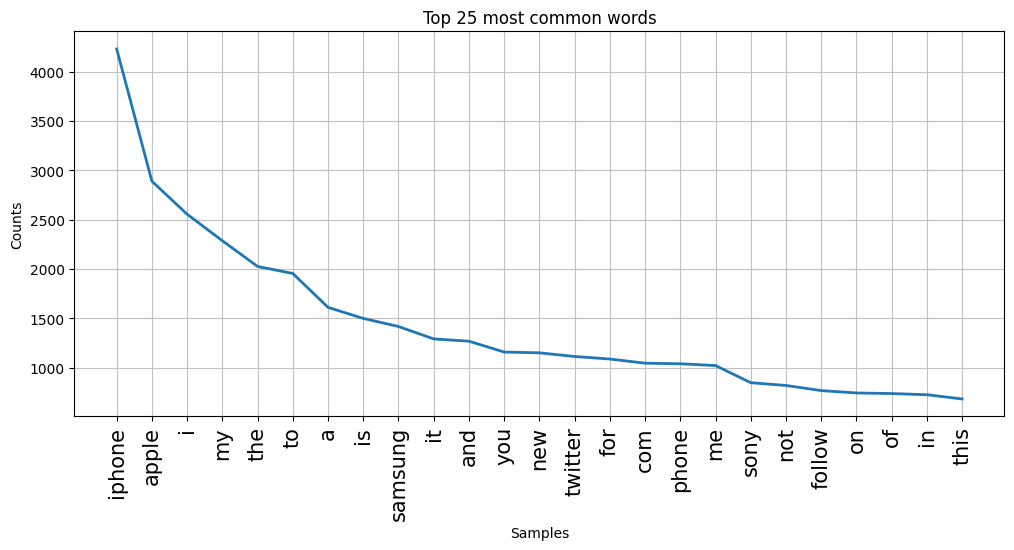

In [47]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


## DV After applying Stop words

In [48]:
type(combined_stopwords)

set

In [49]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [50]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [51]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [52]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


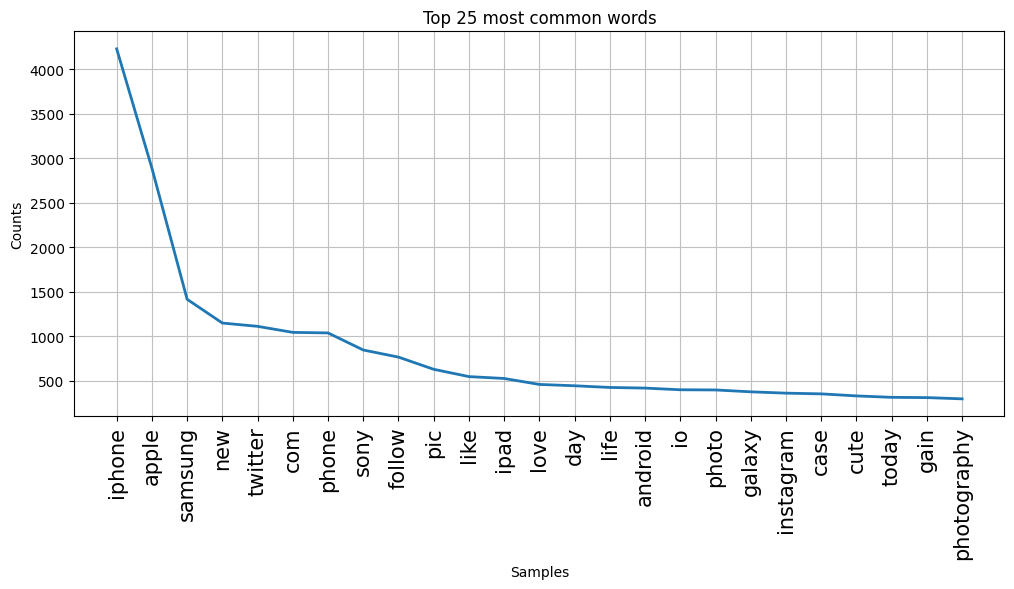

In [53]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [54]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [55]:
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


# 4. Bag of Words Model (Feature Extraction)

- Countvectorizer
- TF-IDF Vectorizer

In [56]:
data.shape

(7920, 4)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])


In [58]:
CV_features.shape

(7920, 15955)

In [59]:
CV_features[0]

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [60]:
# df = data.copy()
# df.columns = ['label', 'cleaned_tweets_incl_SW', 'cleaned_tweets_SW_removed', 'cleaned_tweets_SW_removed_len_gt2']
# df.to_pickle('cleaned_tweets.pkl')
# df.to_csv('cleaned_tweets', index=False)

In [61]:
type(CV_features[0])  # each row is a compressed spare row

scipy.sparse._csr.csr_matrix

In [62]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [63]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df
# Document-Term-Matrix X = [N x p ]
# N = no. of documentns
# p = no. of unique words in the vocab!!# this is your D

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.size/1e6  # these many elements/numbers are presnt in the df

126.3636

In [65]:
import numpy as np
np.count_nonzero(df)

114973

In [66]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.09098585352110893

In [67]:
print(CV.get_feature_names_out()[:50])  # these are the vocab words


['aa' 'aaaahhhhhhh' 'aag' 'aah' 'aalborg' 'aand' 'aapl' 'aarhus' 'aaron'
 'aarp' 'aarrrggghhhh' 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc' 'abdou' 'abe' 'aber' 'abercrombie' 'abi'
 'ability' 'abit' 'able' 'ableton' 'abnqum' 'aboard' 'about' 'aboutalook'
 'aboutdamntime' 'abouttime' 'abouttonight' 'above' 'abp' 'abscbn'
 'absence' 'absolute' 'absolutely' 'absurd' 'abu' 'abudhabi' 'abuja'
 'abujacity' 'abujafct' 'abujapeople' 'abujaphones']


In [68]:
# CV.get_feature_names_out()[:50]  # these the vocab words

In [69]:
len(CV.get_feature_names_out())
#len(CV.get_feature_names())

15955

In [70]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [71]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

# 5. Model building

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)

0.9779461279461279
0.8813131313131313


In [74]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)

0.9038720538720538
0.8813131313131313


In [75]:
## leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [76]:
X = CV_features
y = data['label']

In [77]:
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


In [78]:
# our's model accuracy = 88.23 +/- 0.93 %

In [79]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [80]:
results

{'fit_time': array([0.03857613, 0.04033995, 0.03761315, 0.03618526, 0.03610063]),
 'score_time': array([0.00142288, 0.00141287, 0.0014565 , 0.00145912, 0.00142765]),
 'test_score': array([0.88320707, 0.86931818, 0.87752525, 0.89709596, 0.88699495]),
 'train_score': array([0.90388258, 0.90893308, 0.9040404 , 0.90372475, 0.90451389])}

In [81]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

[0.90388258 0.90893308 0.9040404  0.90372475 0.90451389]
90.5 0.2


In [82]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


## Hyper parameter tuning of the LR1 model

In [83]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [84]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [85]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8902777777777777, 19)

In [86]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [87]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.02777777777777

In [88]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

93.28598484848484

In [89]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6614040835206474

In [90]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84494949, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88156566, 0.88295455, 0.88497475,
       0.88560606, 0.88661616, 0.88699495, 0.88863636, 0.88939394,
       0.88888889, 0.88939394, 0.88939394, 0.89015152, 0.89027778])

In [91]:
grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.85      , 0.86998106, 0.88030303, 0.88718434,
       0.89232955, 0.89649621, 0.90094697, 0.90501894, 0.90811237,
       0.91003788, 0.91344697, 0.91568813, 0.91859217, 0.92130682,
       0.92332702, 0.92604167, 0.92856692, 0.93055556, 0.93285985])

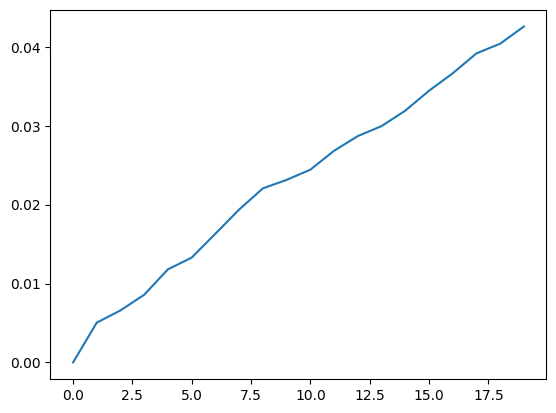

In [92]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [93]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [94]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [95]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  5.05050505e-03,  6.59722222e-03,  8.58585859e-03,
        1.18055556e-02,  1.32891414e-02,  1.63194444e-02,  1.93813131e-02,
        2.20643939e-02,  2.31376263e-02,  2.44318182e-02,  2.68308081e-02,
        2.86931818e-02,  2.99558081e-02,  3.19128788e-02,  3.44381313e-02,
        3.66477273e-02,  3.91729798e-02,  4.04040404e-02,  4.25820707e-02])

In [96]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

88.28 0.93


In [97]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [98]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [99]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

15955

In [100]:
# print(CV_pipe['CV'].vocabulary_)

# 6. LR Model without vs with stop_words ??

In [101]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']
#applied the stopwords by using the argument in count vectorizer
CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

86.87 1.07


15673

In [102]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

86.77 1.03


1086

In [103]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

85.24 1.3


300

# 7. TF-IDF Vector BoW Model + Logistic Regression

In [104]:
doc1 = 'I love cooking'
doc2 = 'Today I cooked pasta today'

In [105]:
# TF_score = how many times a word (from the vocab) is appearing in a given doc / total no. of words in that doc
# TF(today | doc2) = 2/5
# TF_score will be high for "very frequent" words in a given doc

# IDF_score = log( (1+Total no. of documents) / (1+No. of documents contianing that "term") )
# IDF_score penalizes those those words which are EQUALLY frequent in almost all the documents

# TF_IDF score = TF_score*IDF_score

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.82 0.14
85.24 0.84


1000

# 8. Dimesionality Reduction

In [107]:
# [7920 x 15955] >>> [7920 x 1000]

In [108]:
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_tweets_w/o_SW']
y = data['label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)

87.42 0.25
86.57 0.83


15955

In [109]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

# 9. N-Gram Models

In [110]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.89 0.2
86.84 0.68


3322

In [111]:
# CV.vocabulary_

In [112]:
CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             'off', 'his', 'formerly', 'beside', 'between',
                             'above', 'nobody', 'become', 'would', 'nor', 'it',
                             'both', 'afterwards', 'found', 'because', 'then',
                             'as', 'thence', 'hundred', 'already', 'hadn', 'we',
                             "you'd", 'own', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [113]:
import joblib
joblib.__version__

'1.3.2'

In [114]:
# pip install --upgrade joblib==1.1.0

In [115]:
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.8 MB/s eta 0:00:00


In [116]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.88 0.2
86.84 0.68


3871

In [117]:
# CV.vocabulary_

In [118]:
# 0 refers to positive sentiment, 1 is negative sentiment


10.
word embeddings

In [119]:
tweets_list = list(data['cleaned_tweets_w/o_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [120]:
!pip install gensim

In [121]:
# Creating your own Word2Vec Model & Train
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [122]:
# summarize the loaded model
print(cbow_model)

Word2Vec<vocab=2420, vector_size=300, alpha=0.025>


In [123]:
cbow_model.wv.index_to_key[:20]  # this your vocab

['iphone',
 'apple',
 'i',
 'my',
 'the',
 'to',
 'a',
 'is',
 'samsung',
 'it',
 'and',
 'you',
 'new',
 'twitter',
 'for',
 'com',
 'phone',
 'me',
 'sony',
 'not']

In [124]:
len(cbow_model.wv.index_to_key)

2420

In [125]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

# np.mean(model[doc], axis=0)

In [126]:
tweets_temp = data['cleaned_tweets_w/o_SW'].apply(document_vector)

In [127]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

0    [0.14689639, 0.33246034, -0.074412756, 0.10434079, 0.043259747, -0.42998096, 0.10758968, 0.63904446, -0.12476531, 0.0477666, -0.055573825, -0.1306646, -0.065508924, -0.06806622, -0.10101214, -0.09...
1    [0.026599223, 0.2101477, -0.042823564, 0.05375623, 0.009607352, -0.2767738, 0.18485747, 0.47163445, 0.046016186, -0.30667323, 0.0059240633, -0.27040452, -0.007697561, 0.098428436, -0.20677729, -0....
2    [0.008959078, 0.16783778, 0.052722123, 0.13912036, -0.020901963, -0.15536176, 0.197616, 0.45256147, 0.13043782, -0.2151565, 0.045154437, -0.2277203, -0.018973213, 0.052496877, -0.17979343, -0.1208...
3    [0.043517377, 0.1628685, 0.08857048, 0.19536671, -0.035779756, -0.12598786, 0.23481041, 0.48565254, 0.20776786, -0.27274612, 0.08898123, -0.28927538, 0.008687754, 0.0966695, -0.21144785, -0.109653...
4    [0.005446816, 0.14613508, 0.06453856, 0.16828348, -0.035792395, -0.11894219, 0.23281123, 0.45685232, 0.2019344, -0.31115937, 0.07764563, -0.28289387, -0.017035432, 0.08603535,

In [128]:
tweets_temp[0].shape  # each document vecotr is 300-dimensional !!

(300,)

In [129]:
type(tweets_temp)

pandas.core.series.Series

In [130]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(7920, 300)

In [131]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [132]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,0.146896,0.332460,-0.074413,0.104341,0.043260,-0.429981,0.107590,0.639044,-0.124765,0.047767,...,0.303549,0.083417,0.066857,0.252051,0.305805,0.028461,-0.122510,0.144189,-0.095544,0
1,0.026599,0.210148,-0.042824,0.053756,0.009607,-0.276774,0.184857,0.471634,0.046016,-0.306673,...,0.276338,0.172715,0.021964,0.284962,0.243253,-0.014188,-0.166927,0.195156,-0.136242,0
2,0.008959,0.167838,0.052722,0.139120,-0.020902,-0.155362,0.197616,0.452561,0.130438,-0.215156,...,0.270940,0.164524,0.058776,0.268535,0.251614,0.021490,-0.073476,0.122241,-0.088229,0
3,0.043517,0.162868,0.088570,0.195367,-0.035780,-0.125988,0.234810,0.485653,0.207768,-0.272746,...,0.316393,0.203300,0.090467,0.352224,0.250806,0.040934,-0.042744,0.137023,-0.075843,0
4,0.005447,0.146135,0.064539,0.168283,-0.035792,-0.118942,0.232811,0.456852,0.201934,-0.311159,...,0.293023,0.204064,0.059839,0.319942,0.265467,0.030492,-0.075250,0.121047,-0.094762,1


In [133]:
df.shape

(7920, 301)

In [134]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(7920, 300)

In [135]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

85.44 0.18
85.4 0.6


In [137]:
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

88.95 0.07


In [138]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer(max_features=300, min_df=5)),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [139]:
import pickle

pickle.dump(CV_pipe, open('twitter_sentiment.pkl', 'wb'))

In [140]:
test_tweeet=["i  will be not doing the work"]
CV_pipe.predict(test_tweeet)

array([1])